In [2]:
import os
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import glob
import numpy as np
import shutil

In [2]:
def show_bbox(image_path):
    # convert image path to label path
    label_path = image_path.replace('/images/', '/labels/')
    label_path = label_path.replace('.jpg', '.txt')

    # Open the image and create ImageDraw object for drawing
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    with open(label_path, 'r') as f:
        for line in f.readlines():
            # Split the line into five values
            label, x, y, w, h = line.split(' ')

            # Convert string into float
            x = float(x)
            y = float(y)
            w = float(w)
            h = float(h)

            # Convert center position, width, height into
            # top-left and bottom-right coordinates
            W, H = image.size
            x1 = (x - w/2) * W
            y1 = (y - h/2) * H
            x2 = (x + w/2) * W
            y2 = (y + h/2) * H

            # Draw the bounding box with red lines
            draw.rectangle((x1, y1, x2, y2),
                           outline=(255, 0, 0), # Red in RGB
                           width=5)             # Line width
    image.show()


def get_filenames(folder):
    filenames = set()
    
    for path in glob.glob(os.path.join(folder, '*.jpg')):
        # Extract the filename
        filename = os.path.split(path)[-1]        
        filenames.add(filename)

    return filenames


In [ ]:
print(os.path.exists('../data/raw/screwdriver_1'))
show_bbox('../data/raw/screwdriver_1/images/6d66b425-8dcea198-702b-46c9-add3-c4924c28eb23.jpg')

In [4]:
# Dog and cat image filename sets
dog_images = get_filenames('download/dog/images')
cat_images = get_filenames('download/cat/images')

In [ ]:
# Create a folder structure for YOLO11 training
for split in ['train', 'val', 'test']:
    for folder in ['images', 'labels']:
        os.makedirs(f'data/{folder}_croissants/{split}')

In [6]:
# Copy background images to the backgrounds folder
for folderpath in glob.glob('../data/raw/indoorCVPR_09/Images/*/'):
    for imagepath in glob.glob(os.path.join(folderpath, '*.jpg')):
        # Get the filename
        filename = os.path.split(imagepath)[-1]
        print(filename)
        # Copy the image to the train folder
        shutil.copy(imagepath, f'../data/raw/backgrounds/indoorCVPR_09_images/{filename}')
        
        # # Copy the label file to the train folder
        # label_path = imagepath.replace('/images/', '/darknet/').replace('.jpg', '.txt')
        # shutil.copy(label_path, f'data/labels/train/{filename.replace(".jpg", ".txt")}')

sala_de_juegos_03_06_altavista.jpg
OR_99_2_5387_32_l.jpg
images_vrimages_11242_gameroom.jpg
salle_de_jeux56.jpg
SD_00_06_51275_24_l.jpg
fac_gameroom.jpg
gameroom_pocket.jpg
OR_99_4_8965_34_l.jpg
gameroom4.jpg
OGS_jeux_web.jpg
sala_de_juegos_24_14_altavista.jpg
OR_99_9_0039_06_l.jpg
WedSocial_Graceland_GameRoom_2.jpg
Timeshare_gameroom.jpg
doc0003.jpg
Gameroom7.jpg
salle_de_jeux_07_14_altavista.jpg
AT_98_4_1270_26_l.jpg
gameroom78.jpg
sala_de_juegos_16_19_altavista.jpg
AT_99_4_7096_33_l.jpg
HO_06_02_2000_99_l.jpg
gameroom688.jpg
gameroom2_600x448.jpg
salle_de_jeux_09_05_altavista.jpg
Salle_expositions_jeux_d_echecs_02.jpg
sallejeux567.jpg
sallejeux78.jpg
salle_de_jeux_07_19_altavista.jpg
room381.jpg
TA_99_2_0321_32_l.jpg
game_room.jpg
salle_de_jeux_03_12_altavista.jpg
Salle_Jeux_58936.jpg
LV_00_05_4690_34_l.jpg
gameroom_inside1.jpg
sala_de_juegos_17_07_altavista.jpg
AT_00_01_8142_36A_l.jpg
smallsp001.jpg
OR_02_05_0481_11_l.jpg
8a_gameroom2.jpg
HO_06_03_3000_63_l.jpg
salle_de_jeux_05_19_

In [ ]:
dog_images = np.array(list(dog_images))
cat_images = np.array(list(cat_images))

# Use the same random seed for reproducability
np.random.seed(42)
np.random.shuffle(dog_images)
np.random.shuffle(cat_images)


def split_dataset(animal, image_names, train_size, val_size):
    for i, image_name in enumerate(image_names):
        # Label filename
        label_name = image_name.replace('.jpg', '.txt')
        
        # Split into train, val, or test
        if i < train_size:
            split = 'train'
        elif i < train_size + val_size:
            split = 'val'
        else:
            split = 'test'
        
        # Source paths
        source_image_path = f'download/{animal}/images/{image_name}'
        source_label_path = f'download/{animal}/darknet/{label_name}'

        # Destination paths
        target_image_folder = f'data/images/{split}'
        target_label_folder = f'data/labels/{split}'

        # Copy files
        shutil.copy(source_image_path, target_image_folder)
        shutil.copy(source_label_path, target_label_folder)

# # Cat data
# split_dataset('cat', cat_images, train_size=400, val_size=50)

# # Dog data (reduce the number by 1 for each set due to three duplicates)
# split_dataset('dog', dog_images, train_size=399, val_size=49)

In [ ]:
croissant_images = get_filenames('data/cut_and_paste_croissants/images')

for i, image_name in enumerate(croissant_images):
    img = Image.open(f'data/cut_and_paste_croissants/images/{image_name}')
    img = img.resize((640,480),Image.LANCZOS)
    num = image_name.split('_')[0]
    annotation = f'data/cut_and_paste_croissants/annotations/{num}.xml'
    # annotation = f'data/cut_and_paste_croissants/annotations'

    # Destination paths
    target_image = f'data/images_croissants/train/{image_name}'
    target_label_folder = f'data/labels_croissants/train'

    # Copy files
    # img.save(target_image)
    for blur_type in ['box', 'gaussian', 'motion', 'none', 'poisson']:
        # os.system(f'XmlToTxt-master/xmltotxt.py -c XmlToTxt-master/classes.txt -xml {annotation} -out data/labels_croissants/train')
    break 
    if int(num) > 20:
        continue


In [ ]:
for image in glob.glob(f"data/cut_and_paste_croissants/annotations/*"):
    for blur_type in ['box', 'gaussian', 'motion', 'none', 'poisson']:
        if int(os.path.basename(image).split('.')[0]) <= 10:
            print(f"data/tmp/{os.path.basename(image).split('.')[0]}_{blur_type}.xml")
            shutil.copy(image, f"data/tmp/{os.path.basename(image).split('.')[0]}_{blur_type}.xml")

In [39]:
model = YOLO("yolo11n.pt")
results = model.train(data="YOLOv11-finetuning/croissants.yaml", epochs=100, imgsz=640, freeze=11, batch=16, workers=4, name='yolo11n_croissants')

New https://pypi.org/project/ultralytics/8.3.161 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.159 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (Quadro RTX 6000, 24024MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=YOLOv11-finetuning/croissants.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=11, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11n_croissants, nbs=64, nms=False, 

train: Scanning /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/data/train/labels.cache... 62 images, 120 backgrounds, 12 corrupt: 100%|██████████| 182/182 [00:00<?, ?it/s]

train: /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/data/train/images/00c3a38d7a8c908b.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/data/train/images/0708ba0491d34c56.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/data/train/images/1c13e53bf6245f17.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/data/train/images/1cb282b7b1977666.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/data/train/images/1ea08737696f8246.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1385.2±1545.6 MB/s, size: 234.1 KB)


val: Scanning /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/data/val/labels... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<00:00, 617.02it/s]

val: New cache created: /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/data/val/labels.cache


Plotting labels to /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/runs/detect/yolo11n_croissants/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/runs/detect/yolo11n_croissants
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.52G     0.7135      4.044      1.043          7        640: 100%|██████████| 11/11 [00:01<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all         13         20    0.00513          1       0.31      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.52G     0.6669      3.658     0.9007         13        640:   9%|▉         | 1/11 [00:00<00:01,  5.21it/s]


KeyboardInterrupt: 


image 1/1 /home/decla_5ay7wb/RIPS25-AnalogDevices-ObjectDetection/src/../data/raw/image.png: 384x640 1 Person, 3 Bottles, 1 Desk, 1 Faucet, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


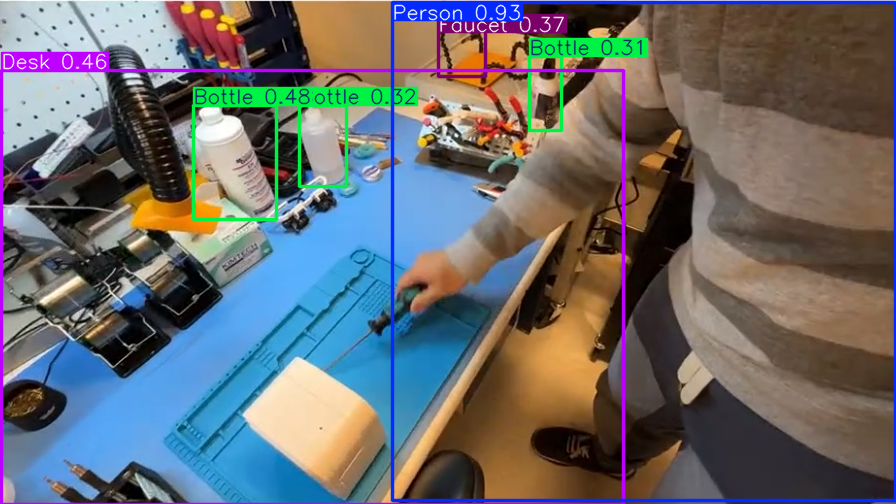

In [7]:
model = YOLO('../src/yolo11n_object365.pt')

results = model('../data/raw/image.png')
# Display the results
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen